In [7]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

%matplotlib notebook
plt.rcParams.update({'font.size': 13})

In [3]:
a_type = 'barnes' #'brute'
gpu = 'tesla' #'tesla'

if a_type == 'brute':
    if gpu == 'gtx':
        # brute : GTX 1070
        t_1024 = [0.627, 0.244, 0.264, 0.254, 0.280]
        t_4096 = [7.763, 2.103, 0.852, 0.865, 1.091]
        t_16384 = [122.138, 31.028, 11.458, 9.943, 9.544]
        t_65536 = [2034.802, 499.169, 181.769, 159.49, 149.830]
    elif gpu == 'tesla':
        # brute : Tesla K40
        t_1024 = [0.548, 0.453, 0.467, 0.450, 0.461]
        t_4096 = [10.258, 2.80, 0.94, 0.948, 0.949]
        t_16384 = [158.713, 40.19, 10.679, 5.731, 5.75]
        t_65536 = [2543.66, 643.444, 170.822, 91.045, 47.31]
    nbthreads = [256, 1024, 4096, 16384, 65535]
elif a_type == 'barnes':
    if gpu == 'gtx':
        # barnes : GTX 1070
        t_1024 = [0.617, 0.402, 0.374, 0.477, 0.411, 0.486]
        t_4096 = [1.976, 0.953, 0.479, 0.477, 0.487, 0.560]
        t_16384 = [9.248, 3.850, 1.536, 1.003, 1.061, 1.375]
        t_65536 = [40.865, 6.7, 3.654, 3.804, 3.096, 3.355]
        t_262144 = [161.028, 43.776, 25.578, 12.126, 11.79, 8.719]
        t_1048576 = [671.50, 188.336, 60.901, 40.592, 36.371, 32.923]
        
        seq = [0.134, 0.670, 2.849, 15.098, 69.750, 239.122]
    elif gpu == 'tesla':
        # barnes : Tesla K40
        t_1024 = [1.196, 0.833, 0.841, 0.853, 0.864, 0.954]
        t_4096 = [3.592, 1.742, 0.987, 0.985, 0.998, 1.093]
        t_16384 = [11.797, 6.433, 2.605, 1.981, 1.99, 2.276]
        t_65536 = [66.408, 29.146, 6.379, 4.78, 5.95, 5.87]
        t_262144 = [166.1, 84.657, 36.926, 30.19, 22.859, 18.606]
        t_1048576 = [820.276, 324.755, 113.195, 99.086, 83.85, 64.439]
        
        seq = [0.245,1.203,5.4239,26.475,127.314,456.866]
        
    nbthreads = [256, 1024, 4096, 16384, 65535, 262144]
        

        
speedup_1024 = [t_1024[0]/i for i in t_1024]
speedup_4096 = [t_4096[0]/i for i in t_4096]
speedup_16384 = [t_16384[0]/i for i in t_16384]
speedup_65536 = [t_65536[0]/i for i in t_65536]

if a_type == 'barnes':     
    speedup_1024 = [1]+[seq[0]/i for i in t_1024]
    speedup_4096 = [1]+[seq[1]/i for i in t_4096]
    speedup_16384 = [1]+[seq[2]/i for i in t_16384]
    speedup_65536 = [1]+[seq[3]/i for i in t_65536]
    speedup_262144 = [1]+[seq[4]/i for i in t_262144]
    speedup_1048576 = [1]+[seq[5]/i for i in t_1048576]
    

#one_one = [t_1024[1], t_4096[2], t_16384[3], t_65536[4]]

In [4]:
def power(my_list):
    return [ 10**x for x in my_list ]

In [5]:
reg_1024 = LinearRegression().fit(np.log10(np.array(nbthreads).reshape(-1,1)), np.log10(t_1024))
reg_4096 = LinearRegression().fit(np.log10(np.array(nbthreads).reshape(-1,1)), np.log10(t_4096))
reg_16384 = LinearRegression().fit(np.log10(np.array(nbthreads).reshape(-1,1)), np.log10(t_16384))
reg_65536 = LinearRegression().fit(np.log10(np.array(nbthreads).reshape(-1,1)), np.log10(t_65536))

if a_type == 'barnes':
    reg_262144 = LinearRegression().fit(np.log10(np.array(nbthreads).reshape(-1,1)), np.log10(t_262144))
    reg_1048576 = LinearRegression().fit(np.log10(np.array(nbthreads).reshape(-1,1)), np.log10(t_1048576))

#one_one_curve = LinearRegression().fit(np.log10(np.array(nbthreads[1:]).reshape(-1,1)), np.log10(one_one))

<IPython.core.display.Javascript object>


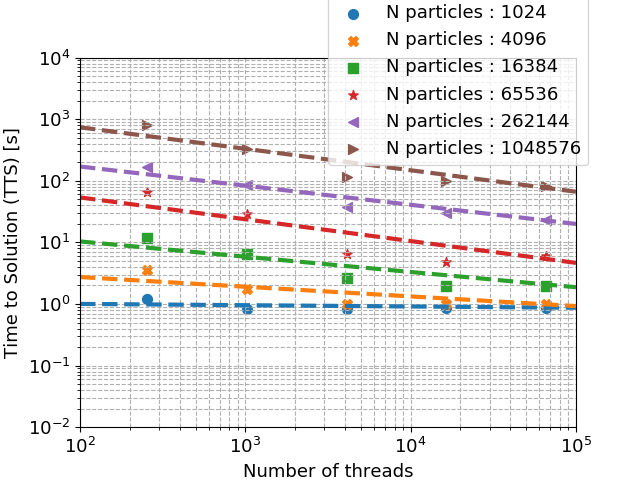

In [8]:
fig = plt.figure()
xp = np.logspace(2,5,100)

plt.scatter(nbthreads, t_1024, label='N particles : 1024', marker='o',s=50)
plt.scatter(nbthreads, t_4096, label='N particles : 4096', marker='X',s=50)
plt.scatter(nbthreads, t_16384, label='N particles : 16384', marker='s',s=50)
plt.scatter(nbthreads, t_65536, label='N particles : 65536', marker='*',s=50)

if a_type == 'barnes':
    plt.scatter(nbthreads, t_262144, label='N particles : 262144', marker='<',s=50)
    plt.scatter(nbthreads, t_1048576, label='N particles : 1048576', marker='>',s=50)
    

plt.plot(xp, power(reg_1024.coef_[0]*np.log10(xp) + reg_1024.intercept_), '--', linewidth=3)
plt.plot(xp, power(reg_4096.coef_[0]*np.log10(xp) + reg_4096.intercept_), '--', linewidth=3)
plt.plot(xp, power(reg_16384.coef_[0]*np.log10(xp) + reg_16384.intercept_), '--', linewidth=3)
plt.plot(xp, power(reg_65536.coef_[0]*np.log10(xp) + reg_65536.intercept_), '--', linewidth=3)

if a_type == 'barnes':
    plt.plot(xp, power(reg_262144.coef_[0]*np.log10(xp) + reg_262144.intercept_), '--', linewidth=3)
    plt.plot(xp, power(reg_1048576.coef_[0]*np.log10(xp) + reg_1048576.intercept_), '--', linewidth=3)

#plt.plot(xp, power(one_one_curve.coef_[0]*np.log10(xp) + one_one_curve.intercept_), '--', linewidth=2, label = ' NParticles/nbThreads = 1')


plt.legend(loc=(0.5, 0.71))
plt.ylim( (10**-2,10**4) )
plt.xlim( (10**2,10**5) )
plt.grid(True, which="both",linestyle='--')

plt.yscale('log')
plt.xscale('log')

plt.xlabel('Number of threads')
plt.ylabel('Time to Solution (TTS) [s]')
#plt.show()
plt.savefig('figs/barnes_tts_tesla.png')

In [ ]:
if a_type == 'barnes':
    nbthreads = [1] + nbthreads
    reg_262144 = LinearRegression().fit(np.log10(np.array(nbthreads).reshape(-1,1)), np.log10(speedup_262144))
    reg_1048576 = LinearRegression().fit(np.log10(np.array(nbthreads).reshape(-1,1)), np.log10(speedup_1048576))
    
reg_1024 = LinearRegression().fit(np.log10(np.array(nbthreads).reshape(-1,1)), np.log10(speedup_1024))
reg_4096 = LinearRegression().fit(np.log10(np.array(nbthreads).reshape(-1,1)), np.log10(speedup_4096))
reg_16384 = LinearRegression().fit(np.log10(np.array(nbthreads).reshape(-1,1)), np.log10(speedup_16384))
reg_65536 = LinearRegression().fit(np.log10(np.array(nbthreads).reshape(-1,1)), np.log10(speedup_65536))

In [ ]:
fig = plt.figure()
xp = nbthreads

plt.scatter(nbthreads, speedup_1024, label='N particles : 1024. Slope {:.2f}'.format(reg_1024.coef_[0]) ,marker='o',s=50)
plt.scatter(nbthreads, speedup_4096, label='N particles : 4096. Slope {:.2f}'.format(reg_4096.coef_[0]), marker='X',s=50)
plt.scatter(nbthreads, speedup_16384, label='N particles : 16384. Slope {:.2f}'.format(reg_16384.coef_[0]), marker='s',s=50)
plt.scatter(nbthreads, speedup_65536, label='N particles : 65536. Slope {:.2f}'.format(reg_65536.coef_[0]), marker='*',s=50)
if a_type == 'barnes':
    plt.scatter(nbthreads, speedup_262144, label='N particles : 262144. Slope {:.2f}'.format(reg_262144.coef_[0]), marker='<',s=50)
    plt.scatter(nbthreads, speedup_1048576, label='N particles : 1048576. Slope {:.2f}'.format(reg_1048576.coef_[0]), marker='>',s=50)

y_1024 = power(reg_1024.coef_[0]*np.log10(xp)+ reg_1024.intercept_) - 10**(reg_1024.coef_[0]*np.log10(xp[0]) + reg_1024.intercept_) + 1
y_4096 = power(reg_4096.coef_[0]*np.log10(xp)+ reg_4096.intercept_) - 10**(reg_4096.coef_[0]*np.log10(xp[0]) + reg_4096.intercept_) + 1
y_16384 = power(reg_16384.coef_[0]*np.log10(xp)+ reg_16384.intercept_) - 10**(reg_16384.coef_[0]*np.log10(xp[0]) + reg_16384.intercept_) + 1
y_65536 = power(reg_65536.coef_[0]*np.log10(xp)+ reg_65536.intercept_) - 10**(reg_65536.coef_[0]*np.log10(xp[0]) + reg_65536.intercept_) + 1

plt.plot(xp, y_1024, '--', linewidth=3)
plt.plot(xp, y_4096, '--', linewidth=3)
plt.plot(xp, y_16384, '--', linewidth=3)
plt.plot(xp, y_65536, '--', linewidth=3)

if a_type == 'barnes':
    y_262144 = power(reg_262144.coef_[0]*np.log10(xp)+ reg_262144.intercept_) - 10**(reg_262144.coef_[0]*np.log10(xp[0]) + reg_262144.intercept_) + 1
    y_1048576 = power(reg_1048576.coef_[0]*np.log10(xp)+ reg_1048576.intercept_) - 10**(reg_1048576.coef_[0]*np.log10(xp[0]) + reg_1048576.intercept_) + 1
    plt.plot(xp, y_262144, '--', linewidth=3)
    plt.plot(xp, y_1048576, '--', linewidth=3)

plt.legend(loc=(-0.15, 0.7))
#plt.ylim( (10**0,10**2) )
#plt.xlim( (10**2,10**5) )
plt.grid(True, which="both",linestyle='--')

plt.yscale('log')
plt.xscale('log')

plt.xlabel('Number of threads')
plt.ylabel('Speed-Up')
plt.show()
#plt.savefig('figs/barnes_speedup_gtx.png')